In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords

from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten
from keras.layers import GlobalMaxPooling1D
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer

In [ ]:
S_df = pd.read_csv("train.csv") # dataFrame create based on rows and columns


In [ ]:
S_df

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative
...,...,...,...,...
27476,4eac33d1c0,wish we could come see u on Denver husband l...,d lost,negative
27477,4f4c4fc327,I`ve wondered about rake to. The client has ...,", don`t force",negative
27478,f67aae2310,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,positive
27479,ed167662a5,But it was worth it ****.,But it was worth it ****.,positive


In [ ]:
print(S_df.isnull().sum())

textID           0
text             1
selected_text    1
sentiment        0
dtype: int64


In [ ]:
S_df.dropna(inplace=True)
print(S_df.isnull().sum())

textID           0
text             0
selected_text    0
sentiment        0
dtype: int64


In [ ]:
S_df['sentiment'].value_counts()

neutral     11117
positive     8582
negative     7781
Name: sentiment, dtype: int64

In [ ]:
S_df['sentiment_num']= S_df.sentiment.map({'positive':1,'neutral':0, 'negative':2 })
                                     

In [ ]:
df=pd.DataFrame()

In [ ]:
df['selected_text']=S_df['selected_text']

In [ ]:
df['sentiment_num']=S_df['sentiment_num']

In [ ]:
df

,selected_text,sentiment_num
0,"I`d have responded, if I were going",0
1,Sooo SAD,2
2,bullying me,2
3,leave me alone,2
4,"Sons of ****,",2
...,...,...
27476,d lost,2
27477,", don`t force",2
27478,Yay good for both of you.,1
27479,But it was worth it ****.,1


In [ ]:
X = df['selected_text'] # X denotes feature  of a dataset #Feature Matrix

In [ ]:
y=df['sentiment_num']

# Data Preprocessing

In [ ]:
#cleaning function
def preprocess_text(sen):
    sentence = remove_tags(sen) # Removing html tags
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)  # Remove punctuations and numbers 
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)  # Single character removal.second input argument= '' by blank symbol.
    sentence = re.sub(r'\s+', ' ', sentence)  # Removing multiple spaces
    sentence = sentence.lower() #will make all the text lower case
    sentence = re.sub('\[.*?\]', '', sentence) #'\[.*?\]' will be removed
    sentence = re.sub('https?://\S+|www\.\S+', '', sentence) #'https?://\S+|www\.\S+' will be removed
    sentence = re.sub('<.*?>+', '', sentence) # '<.*?>+' will be removed and sub means substance for substitute 
    sentence = re.sub('\n', '', sentence) 
    sentence = re.sub('\w*\d\w*', '', sentence) #W* is raw text will be removed
    return sentence

In [ ]:
TAG_RE = re.compile(r'<[^>]+>')

def remove_tags(text):
    return TAG_RE.sub('', text)

In [ ]:
X = []
sentences = list(df['selected_text'])
for sen in sentences:
    X.append(preprocess_text(sen))

In [ ]:
X

['i have responded if were going',
 'sooo sad',
 'bullying me',
 'leave me alone',
 'sons of ',
 'http www dothebouncy com smf some shameless plugging for the best rangers forum on earth',
 'fun',
 'soooo high',
 'both of you',
 'wow just became cooler ',
 'as much as love to be hopeful reckon the chances are minimal i never gonna get my cake and stuff',
 'like',
 'dangerously',
 'lost',
 'test test from the lg env ',
 'uh oh am sunburned',
 ' sigh ',
 'sick',
 'onna',
 'hes just not that into you',
 'oh marly m so sorry hope you find her soon ',
 'interesting ',
 'is cleaning the house for her family who is comming later today ',
 'gotta restart my computer thought win was supposed to put an end to the constant rebootiness',
 'see wat mean bout foll friidays it called lose llowers friday smh',
 'the free fillin app on my ipod is fun im addicted',
 'i sorry ',
 ' no internet',
 'fun',
 'power back up not working too',
 'quite heavenly',
 'hope',
 'well so much for being unhappy for abo

In [ ]:
#Finally, we need to divide our dataset into train and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Preparing the Embedding Layer

In [ ]:
#we will use the Tokenizer class from the keras.preprocessing.
#text module to create a word-to-index dictionary. 
#In the word-to-index dictionary, each word in the corpus is used as a key
#, while a corresponding unique index is used as the value for the key. Execute the following script:
#######

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [ ]:
len(X_train)

20610

In [ ]:
len(X)

4693

In [ ]:
len(X_test)

1174

In [ ]:
# set the maximum size of each list to 100. Adding 1 because of reserved 0 index
vocab_size = len(tokenizer.word_index) + 1
maxlen = 100
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [ ]:
vocab_size

14132

In [ ]:
len(X_train)

20610

In [ ]:
!pip install glove_python

     |████████████████████████████████| 266kB 3.4MB/s 
  Created wheel for glove-python: filename=glove_python-0.1.0-cp36-cp36m-linux_x86_64.whl size=700280 sha256=267ed567c8834f80f1d7a3c69e219b2b2ff3740bed1ed128772c8e5a15b0646a
  Stored in directory: /root/.cache/pip/wheels/88/4b/6d/10c0d2ad32c9d9d68beec9694a6f0b6e83ab1662a90a089a4b
Successfully built glove-python


In [ ]:
from numpy import array
from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()
glove_file = open('/content/glove.6B.100d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions
glove_file.close()

#We will use GloVe embeddings to create our feature matrix. 
#In the following script we load the GloVe word embeddings 
#and create a dictionary that will contain words as keys and their corresponding embedding list as values.

In [ ]:
#Finally, we will create an embedding matrix where each row number will correspond to the index of the word in the corpus.
#The matrix will have 100 columns where each column will contain the GloVe word embeddings for the words in our corpus.

In [ ]:
embedding_matrix = zeros((vocab_size, 100))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [ ]:
#After execute the above script, we will see that embedding_matrix will contain 14945 rows
#(one for each word in the corpus). Now we are ready to create our deep learning models.

In [ ]:
embedding_matrix.shape 

(14132, 100)

In [ ]:
embedding_matrix

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.18970001,  0.050024  ,  0.19084001, ..., -0.39804   ,
         0.47646999, -0.15983   ],
       [-0.038194  , -0.24487001,  0.72812003, ..., -0.1459    ,
         0.82779998,  0.27061999],
       ...,
       [ 0.14613999, -0.25102001,  0.23106   , ..., -0.051165  ,
        -0.33289   ,  0.29091999],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

# Text Classification with Simple Neural Network

In [ ]:
model = Sequential()
embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)
model.add(embedding_layer)
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 100)          1413200   
_________________________________________________________________
flatten_1 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 10001     
Total params: 1,423,201
Trainable params: 10,001
Non-trainable params: 1,413,200
_________________________________________________________________
None


In [ ]:
#Since there are 1413200 words in our corpus 
#and each word is represented as a 100-dimensional vector, 
#the number of trainable parameter will be 1413200x100 in the embedding layer. 
#In the flattening layer, we simply multiply rows and column. 
#Finally in the dense layer the number of parameters are 10000 (from the flattening layer) 
#and 1 for the bias parameter, for a total of 10001.

**Train our model** 

In [ ]:
history = model.fit(X_train, y_train, batch_size=128, epochs=6, verbose=1, validation_split=0.25)

Epoch 1/6
121/121 [==============================] - 1s 5ms/step - loss: 0.2626 - acc: 0.4861 - val_loss: 0.1125 - val_acc: 0.5026
Epoch 2/6
121/121 [==============================] - 1s 4ms/step - loss: -0.0827 - acc: 0.4955 - val_loss: -0.0888 - val_acc: 0.5013
Epoch 3/6
121/121 [==============================] - 1s 4ms/step - loss: -0.2986 - acc: 0.4978 - val_loss: -0.2424 - val_acc: 0.4908
Epoch 4/6
121/121 [==============================] - 1s 4ms/step - loss: -0.4866 - acc: 0.4976 - val_loss: -0.3953 - val_acc: 0.5016
Epoch 5/6
121/121 [==============================] - 0s 4ms/step - loss: -0.6662 - acc: 0.4996 - val_loss: -0.5281 - val_acc: 0.4923
Epoch 6/6
121/121 [==============================] - 1s 4ms/step - loss: -0.8393 - acc: 0.4974 - val_loss: -0.6711 - val_acc: 0.5051


In [ ]:
score = model.evaluate(X_test, y_test, verbose=1)

215/215 [==============================] - 0s 2ms/step - loss: -0.7992 - acc: 0.4898


In [ ]:
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: -0.7992162704467773
Test Accuracy: 0.4898107647895813


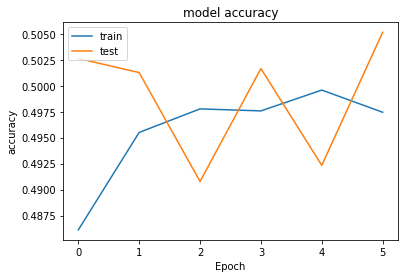

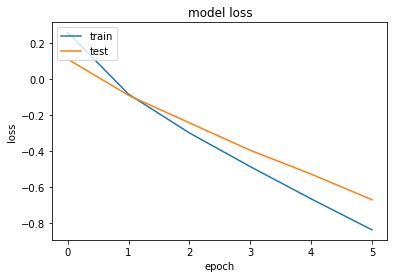

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

# Text Classification with a Convolutional Neural Network

In [ ]:
import numpy
from keras.models import Sequential
from keras.layers.convolutional import Conv1D
numpy.random.seed(7)

model = Sequential()

embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)
model.add(embedding_layer)

model.add(Conv1D(128, 5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [ ]:

print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 100, 100)          1413200   
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 96, 128)           64128     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 129       
Total params: 1,477,457
Trainable params: 64,257
Non-trainable params: 1,413,200
_________________________________________________________________
None


In [ ]:
history = model.fit(X_train, y_train, batch_size=128, epochs=10, verbose=1, validation_split=0.2)

score = model.evaluate(X_test, y_test, verbose=1)

Epoch 1/10
129/129 [==============================] - 12s 92ms/step - loss: -1.4005 - acc: 0.4913 - val_loss: -3.4422 - val_acc: 0.4765
Epoch 2/10
129/129 [==============================] - 12s 91ms/step - loss: -8.6711 - acc: 0.4856 - val_loss: -12.7925 - val_acc: 0.5218
Epoch 3/10
129/129 [==============================] - 12s 89ms/step - loss: -23.3239 - acc: 0.4840 - val_loss: -28.8107 - val_acc: 0.5257
Epoch 4/10
129/129 [==============================] - 11s 89ms/step - loss: -45.8612 - acc: 0.4830 - val_loss: -51.3909 - val_acc: 0.5209
Epoch 5/10
129/129 [==============================] - 12s 90ms/step - loss: -76.1808 - acc: 0.4851 - val_loss: -80.7924 - val_acc: 0.4816
Epoch 6/10
129/129 [==============================] - 11s 89ms/step - loss: -114.6383 - acc: 0.4829 - val_loss: -117.8721 - val_acc: 0.5032
Epoch 7/10
129/129 [==============================] - 11s 89ms/step - loss: -161.1928 - acc: 0.4858 - val_loss: -161.0817 - val_acc: 0.4915
Epoch 8/10
129/129 [=============

In [ ]:
print("Test Score:", score[0])
print("Test Accuracy:", score[1])


Test Score: -363.7861022949219
Test Accuracy: 0.471906840801239


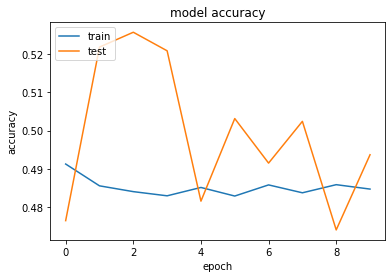

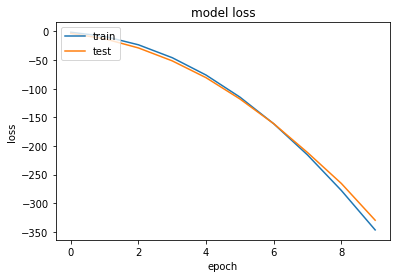

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

In [ ]:
#You can clearly see the loss and accuracy differences between train and test sets.

#Let's now train our third deep learning model, which is a recurrent neural network,
#and see if we can get rid of the overfitting.

# Text Classification with Recurrent Neural Network (LSTM)

In [ ]:
#Recurrent neural network is a type of neural networks that is proven to work well with sequence data. 
#Since text is actually a sequence of words, a recurrent neural network is an automatic choice to solve text-related problems.
#In this section, we will use an LSTM (Long Short Term Memory network) which is a variant of RNN, to solve sentiment classification problem.
#Once again, execute the code until the word embedding section and after that run the following piece of code.

In [ ]:
from keras.layers.core import Dense, Dropout
from keras.layers.recurrent import LSTM

model = Sequential()
embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)
model.add(embedding_layer)
model.add(LSTM(128))

model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [ ]:
print(model.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 100, 100)          1413200   
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               117248    
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 129       
Total params: 1,530,577
Trainable params: 117,377
Non-trainable params: 1,413,200
_________________________________________________________________
None


In [ ]:
history = model.fit(X_train, y_train, batch_size=128, epochs=10, verbose=1, validation_split=0.2)
score = model.evaluate(X_test, y_test, verbose=1)

Epoch 1/10
129/129 [==============================] - 43s 334ms/step - loss: 0.2704 - acc: 0.4205 - val_loss: 1.3270 - val_acc: 0.3222
Epoch 2/10
129/129 [==============================] - 42s 328ms/step - loss: 0.5161 - acc: 0.3110 - val_loss: 0.4004 - val_acc: 0.3222
Epoch 3/10
129/129 [==============================] - 42s 324ms/step - loss: 0.3633 - acc: 0.3110 - val_loss: 0.4134 - val_acc: 0.3222
Epoch 4/10
129/129 [==============================] - 42s 325ms/step - loss: 0.3633 - acc: 0.3110 - val_loss: 0.3992 - val_acc: 0.3222
Epoch 5/10
129/129 [==============================] - 42s 324ms/step - loss: 0.3637 - acc: 0.3110 - val_loss: 0.4110 - val_acc: 0.3222
Epoch 6/10
129/129 [==============================] - 42s 325ms/step - loss: 0.3630 - acc: 0.3110 - val_loss: 0.4014 - val_acc: 0.3222
Epoch 7/10
129/129 [==============================] - 42s 324ms/step - loss: 0.3645 - acc: 0.3110 - val_loss: 0.4028 - val_acc: 0.3222
Epoch 8/10
129/129 [==============================] - 4

In [ ]:
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 0.3702412247657776
Test Accuracy: 0.30960699915885925


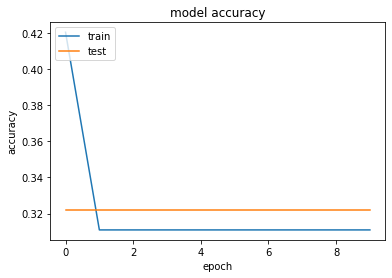

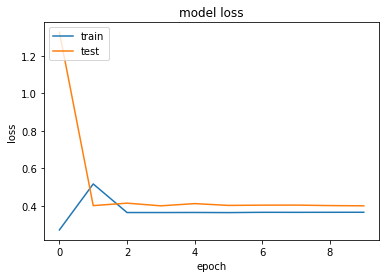

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [ ]:
#Conclusion
#Text classification is one of the most common natural language processing tasks. 
#In this project we saw how to perform sentiment analysis, which is a type of text classification 
#using Keras deep learning library. We used three different types of neural networks 
#to classify text sentiment besed on tween dataset.
#The results show that LSTM, which is a variant of RNN outperforms both the CNN and simple neural network.
#and CNN performing better.